#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score


import torch
import torch.utils.data as utils
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


import warnings
warnings.filterwarnings("ignore")

#### Get the data

In [2]:
data = pd.read_csv('Churn_Modelling.csv') 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
X = data.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1).values

In [7]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [8]:
y = data['Exited'].values

In [9]:
y.shape

(10000,)

#### Encoding Categorical Data

In [10]:
# encode geography feature
labelencoder_1 = LabelEncoder()
X[:, 1] = labelencoder_1.fit_transform(X[:, 1])

# encode gender feature
labelencoder_1 = LabelEncoder()
X[:, 2] = labelencoder_1.fit_transform(X[:, 2])

X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [11]:
X.shape

(10000, 10)

In [12]:
# one hot encoding based of geography feature
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
# "Geography" = the name of the step - can be any name
# OneHotEncoder() = which transformation to apply
# [1] = where to apply the transformation
X = ct.fit_transform(X)

In [13]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [14]:
X.shape

(10000, 12)

In [15]:
# Let's see all the values of the second row
np.set_printoptions(threshold=np.inf)
X[1]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

In [16]:
# to avoid multicoliniarity
X = X[: , 1:]
X[1]

array([0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

#### Split the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Feature Scaling

In [18]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
torch.manual_seed(42)

### Artificial Neural Network

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
# numpy to tensor conversion
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [22]:
class LinearDataset(Dataset):
    def __init__(self, X, y):
        assert X.size()[0] == y.size()[0]
        self.X = X
        self.y = y
    
    def __len__(self):
        return self.X.size()[0]
    
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

In [23]:
# create dataloaders
batch_size = 128
train_loader = utils.DataLoader(LinearDataset(X_train, y_train), batch_size = batch_size, shuffle = True)
test_loader = utils.DataLoader(LinearDataset(X_test, y_test), batch_size = batch_size, shuffle = False)

In [24]:
class MyNeuralNet(nn.Module):
    def __init__(self,input_dim=11,output_dim=1, **kwargs):
        super(MyNeuralNet, self).__init__(**kwargs)
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
         # dropout layer (40%)
        self.dropout = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.output = nn.Linear(16, output_dim)
        

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.sigmoid(self.output(x))
        return x

In [25]:
net = MyNeuralNet(input_dim=11)
print(net)

MyNeuralNet(
  (fc1): Linear(in_features=11, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)


In [26]:
# loss function
loss_fn = nn.MSELoss()

# optimizer
optimizer = optim.Adam(net.parameters(), lr=0.01,weight_decay=1e-6)

In [27]:
epochs = 50
num_examples = len(X_train)
num_examplesVal = len(X_test)
num_batches = num_examples / batch_size
num_batchesVal = num_examplesVal / batch_size
losses = []
lossesVal = []

In [28]:
for e in range(epochs):
    cumulative_loss = 0
    test_loss = 0
    net.train()
    # inner loop
    for i, (data, label) in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        
        yhat = net(data)
        loss = loss_fn(yhat, label.unsqueeze(1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cumulative_loss += loss.item()
        
    net.eval()
    for i, (data, label) in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        yhat = net(data)
        loss = loss_fn(yhat, label.unsqueeze(1))
        test_loss += loss.item()
        
    print("Epoch %s, TrainLoss: %s, TestLoss: %s" % (e, cumulative_loss / num_examples, test_loss / num_examplesVal))
    losses.append(cumulative_loss / num_examples)
    lossesVal.append(test_loss / num_examplesVal)
    #losses.append(cumulative_loss / num_batches)
    #lossesTest.append(test_loss / num_batchesTest)

Epoch 0, TrainLoss: 0.0013087713324597904, TestLoss: 0.0011658522486686707
Epoch 1, TrainLoss: 0.0011046134904026984, TestLoss: 0.0010602045878767966
Epoch 2, TrainLoss: 0.0010476077795028686, TestLoss: 0.0010150111864010492
Epoch 3, TrainLoss: 0.0009995033251387732, TestLoss: 0.0009770202140013376
Epoch 4, TrainLoss: 0.0009412462477173124, TestLoss: 0.0009373774379491806
Epoch 5, TrainLoss: 0.0009317515194416046, TestLoss: 0.0009055713067452112
Epoch 6, TrainLoss: 0.0008964004442095757, TestLoss: 0.0009009699920813243
Epoch 7, TrainLoss: 0.0008993582693593842, TestLoss: 0.0009006081273158391
Epoch 8, TrainLoss: 0.0008833146584885461, TestLoss: 0.0008651028896371523
Epoch 9, TrainLoss: 0.0009039889116372381, TestLoss: 0.0008981383293867111
Epoch 10, TrainLoss: 0.000873421773314476, TestLoss: 0.0008751425892114639
Epoch 11, TrainLoss: 0.0008678041707192148, TestLoss: 0.0008665845567981403
Epoch 12, TrainLoss: 0.0008581353340830121, TestLoss: 0.000845962459842364
Epoch 13, TrainLoss: 0.0

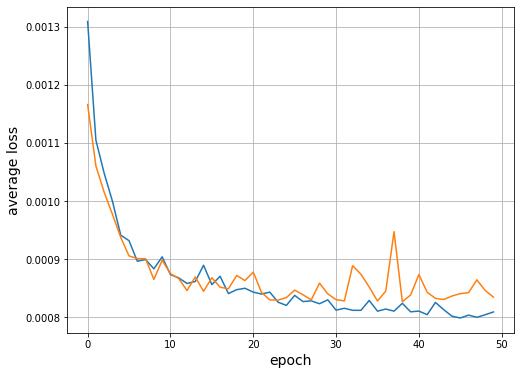

In [29]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(losses)
plt.plot(lossesVal)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch', fontsize=14)
plt.ylabel('average loss', fontsize=14)
plt.show()

In [30]:
net.eval()
y_pred = net(X_test)
r2Ann = r2_score(y_test,y_pred.detach().numpy())
print("R2 of ANN is ",r2Ann)

R2 of ANN is  0.3649583742438637


In [56]:
class MyNeuralNet(nn.Module):
    def __init__(self,input_dim=11,output_dim=1, **kwargs):
        super(MyNeuralNet, self).__init__(**kwargs)
        self.fc1 = nn.Linear(input_dim, 25)
        self.fc2 = nn.Linear(25, 6)
        self.output = nn.Linear(6, output_dim)
        

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.output(x))
        return x

In [57]:
net = MyNeuralNet(input_dim=11)
print(net)

MyNeuralNet(
  (fc1): Linear(in_features=11, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=6, bias=True)
  (output): Linear(in_features=6, out_features=1, bias=True)
)


In [58]:
# loss function
loss_fn = nn.MSELoss()

# optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001,weight_decay=1e-6)

In [59]:
epochs = 50
num_examples = len(X_train)
num_examplesVal = len(X_test)
num_batches = num_examples / batch_size
num_batchesVal = num_examplesVal / batch_size
losses = []
lossesVal = []

In [60]:
for e in range(epochs):
    cumulative_loss = 0
    test_loss = 0
    net.train()
    # inner loop
    for i, (data, label) in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        
        yhat = net(data)
        loss = loss_fn(yhat, label.unsqueeze(1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cumulative_loss += loss.item()
        
    net.eval()
    for i, (data, label) in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        yhat = net(data)
        loss = loss_fn(yhat, label.unsqueeze(1))
        test_loss += loss.item()
        
    print("Epoch %s, TrainLoss: %s, TestLoss: %s" % (e, cumulative_loss / num_examples, test_loss / num_examplesVal))
    losses.append(cumulative_loss / num_examples)
    lossesVal.append(test_loss / num_examplesVal)
    #losses.append(cumulative_loss / num_batches)
    #lossesTest.append(test_loss / num_batchesTest)

Epoch 0, TrainLoss: 0.002041977937732424, TestLoss: 0.0016578145970900853
Epoch 1, TrainLoss: 0.0013504823510135924, TestLoss: 0.0012863455563783645
Epoch 2, TrainLoss: 0.0012392587225352014, TestLoss: 0.0012507115105787913
Epoch 3, TrainLoss: 0.0012021224136863436, TestLoss: 0.0012149864460031191
Epoch 4, TrainLoss: 0.0011702555630888258, TestLoss: 0.0011922014504671097
Epoch 5, TrainLoss: 0.0011485373824834824, TestLoss: 0.001174124797185262
Epoch 6, TrainLoss: 0.001134236706154687, TestLoss: 0.0011600348750750223
Epoch 7, TrainLoss: 0.0011199703173977989, TestLoss: 0.0011457662681738535
Epoch 8, TrainLoss: 0.0011075446371521269, TestLoss: 0.0011347863028446834
Epoch 9, TrainLoss: 0.0010974339959876878, TestLoss: 0.0011222502862413724
Epoch 10, TrainLoss: 0.0010910474860242436, TestLoss: 0.0011181008269389471
Epoch 11, TrainLoss: 0.0010819080280406134, TestLoss: 0.0011097718079884848
Epoch 12, TrainLoss: 0.0010732073336839677, TestLoss: 0.0010984323223431904
Epoch 13, TrainLoss: 0.00

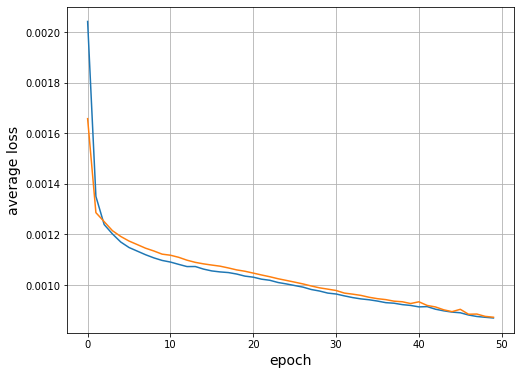

In [61]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(losses)
plt.plot(lossesVal)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch', fontsize=14)
plt.ylabel('average loss', fontsize=14)
plt.show()

In [62]:
net.eval()
y_pred = net(X_test)
r2Ann = r2_score(y_test,y_pred.detach().numpy())
print("R2 of ANN is ",r2Ann)

R2 of ANN is  0.3375136681762745
